In [1]:
# we're going to calculate RMSD of C-flank / SET-I only to: 1zkk_a, 4ij8_a, apo_a, inh_a, inh2_a (these are old
# style names for inh numbering)

In [2]:
# SET-I: I1 - 1zkk, I2 - 4ij8, I3 - apo / C-flank: C1 - 1zkk, C2 - inh, C3 - apo, C4 - inh2

In [3]:
# load references

In [3]:
import mdtraj as md
import numpy as np

In [4]:
zkk = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/1zkk_a.pdb')
ij8 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/4ij8_a.pdb')
apo = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/apo_a.pdb')
inh = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/inh_a.pdb')
inh2 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/inh2_a.pdb')

In [5]:
zkk_ca = zkk.atom_slice(zkk.top.select('name CA'))
ij8_ca = ij8.atom_slice(ij8.top.select('name CA'))
apo_ca = apo.atom_slice(apo.top.select('name CA'))
inh_ca = inh.atom_slice(inh.top.select('name CA'))
inh2_ca = inh2.atom_slice(inh2.top.select('name CA'))

In [6]:
cluster_top10 = [md.load('h5/%d.h5' % x) for x in range(100)]

In [7]:
cluster_top10_ca = [x.atom_slice(x.top.select('name CA')) for x in cluster_top10]

In [8]:
seti_rmsds = []
cflank_rmsds = []
selection1 = np.concatenate([np.arange(24,59), np.arange(94,144)])

for i in range(100):
    trajectory = cluster_top10_ca[i]
    seti_rmsds.append([])
    cflank_rmsds.append([])
    
    # SETI
    selection2 = np.arange(59,94) 
                            
    reference = zkk_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = ij8_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                  
    
    reference = apo_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))) 

    # Cflank
    selection2 = np.arange(144,162) 
                            
    reference = zkk_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = inh_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))) 
    
    reference = apo_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = inh2_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))) 

In [9]:
seti_rmsds[0]

[array([ 0.30304682,  0.36446589,  0.3043085 ,  0.24057028,  0.84770131,
         0.27742991,  0.32137349,  0.73493636,  0.35512257,  0.23130055], dtype=float32),
 array([ 0.52916747,  0.55606151,  0.49224561,  0.52895015,  0.5248881 ,
         0.5010494 ,  0.56454718,  0.49871516,  0.46496558,  0.53132147], dtype=float32),
 array([ 0.77896243,  0.79296464,  0.71905196,  0.76852721,  0.49270746,
         0.74554676,  0.81861532,  0.50974602,  0.68320668,  0.75535136], dtype=float32)]

In [10]:
cflank_rmsds[0]

[array([ 2.11155772,  1.94898832,  2.25880623,  2.27247691,  2.2402072 ,
         2.02134395,  1.80417442,  2.20848751,  2.02812648,  1.88377964], dtype=float32),
 array([ 1.40764821,  1.1533978 ,  1.61068213,  1.49820542,  1.99668801,
         1.22867334,  0.99815154,  1.92837238,  1.37303853,  1.38787425], dtype=float32),
 array([ 0.82825571,  0.66042846,  1.17158651,  0.86237079,  1.61684561,
         0.79076916,  0.68906516,  1.54572845,  0.83851492,  0.90710092], dtype=float32),
 array([ 2.92231655,  2.82216763,  2.85081744,  3.05848956,  2.07174706,
         3.09904981,  2.8896122 ,  2.1422348 ,  2.64189911,  2.58344316], dtype=float32)]

In [11]:
# ok so first for the top100 frames - describe them as two lists and assign C and I categories

In [12]:
top100_rmsds = []
top100_assign = [] # gotta add 1 to these (Ix, Cx are 1-indexed)

for i in range(100):
    top100_rmsds.append([])
    top100_assign.append([])
    top100_rmsds[-1].append([seti_rmsds[i][0][0], seti_rmsds[i][1][0], seti_rmsds[i][2][0]])
    top100_assign[-1].append(np.argmin([seti_rmsds[i][0][0], seti_rmsds[i][1][0], seti_rmsds[i][2][0]])+1)
    top100_rmsds[-1].append([cflank_rmsds[i][0][0], cflank_rmsds[i][1][0], cflank_rmsds[i][2][0], cflank_rmsds[i][3][0]])
    top100_assign[-1].append(np.argmin([cflank_rmsds[i][0][0], cflank_rmsds[i][1][0], cflank_rmsds[i][2][0], cflank_rmsds[i][3][0]])+1)

In [14]:
top100_rmsds[0]

[[0.30304682, 0.52916747, 0.77896243],
 [2.1115577, 1.4076482, 0.82825571, 2.9223166]]

In [26]:
top100_assign[0] # gotta add 1 to these (Ix, Cx are 1-indexed)

[1, 3]

In [16]:
# now make 100 plots - for each microstate plot the SET-I and C-flank RMSDs - and in the title give Ix, Cx

In [13]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

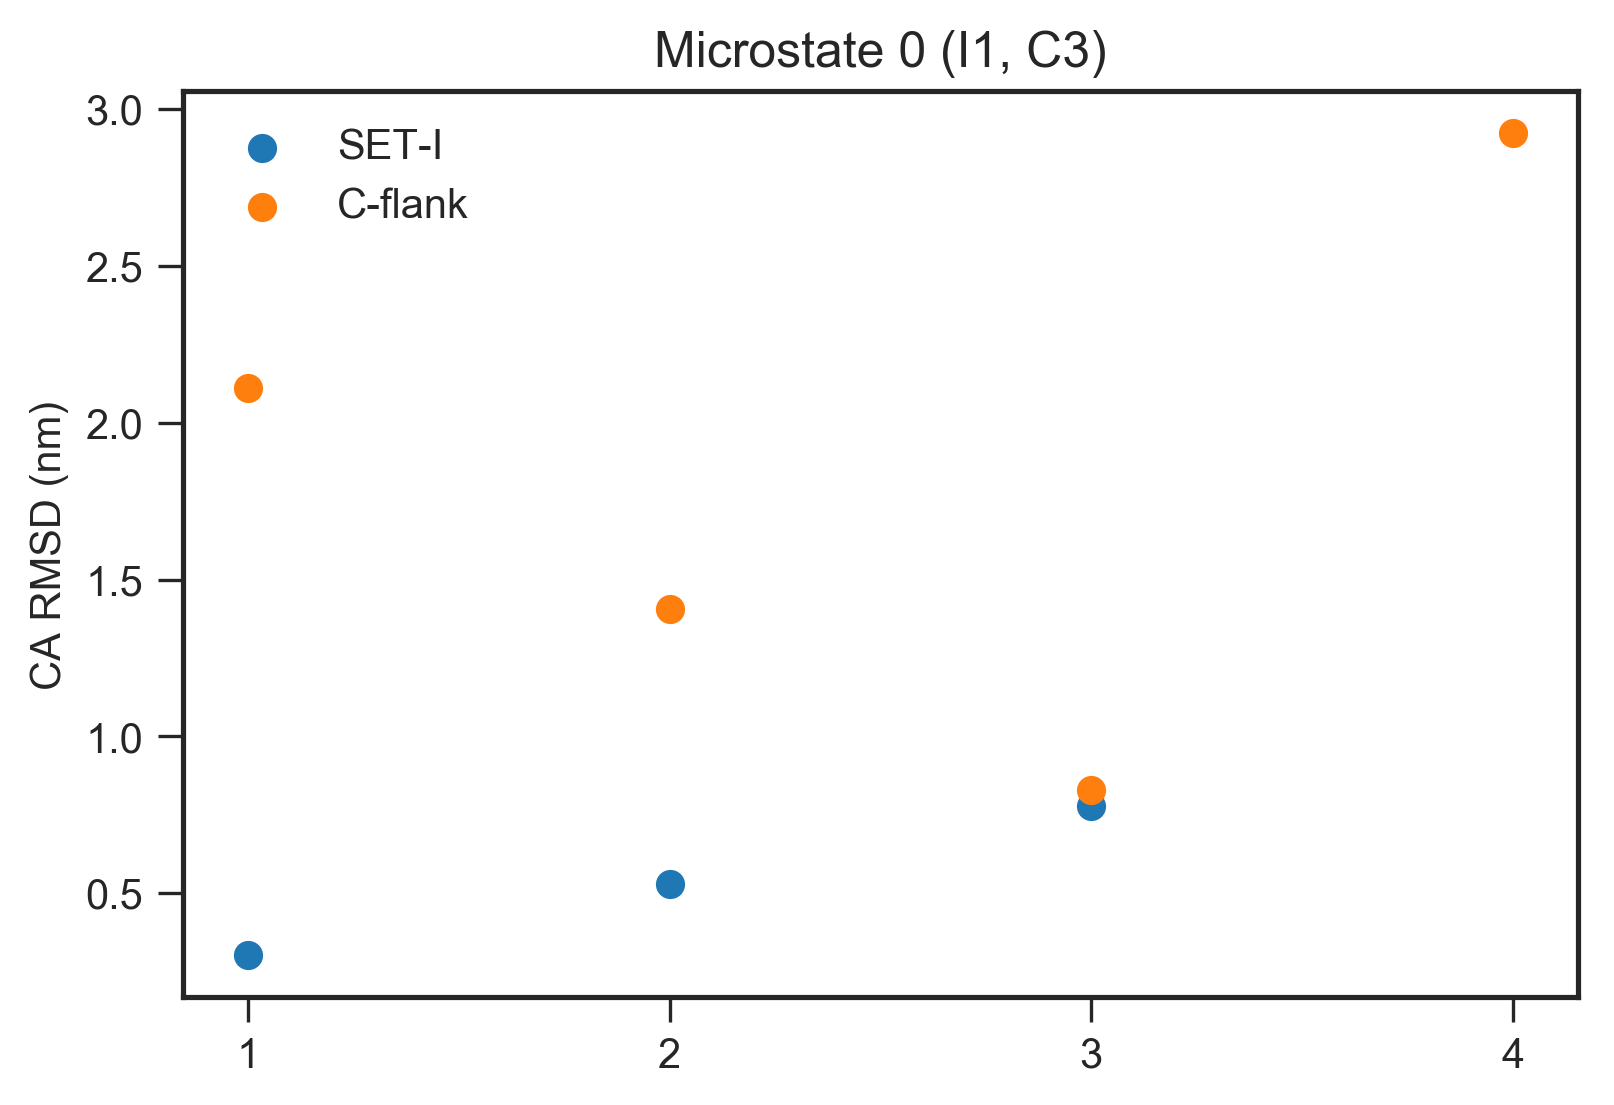

In [36]:
i = 0
plt.figure(dpi=300)
plt.scatter(range(3), top100_rmsds[i][0], label='SET-I')
plt.scatter(range(4), top100_rmsds[i][1], label='C-flank')
plt.ylabel('CA RMSD (nm)')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.legend()
plt.title('Microstate %d (I%d, C%d)' % (i, top100_assign[i][0], top100_assign[i][1]))
plt.show()

In [28]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [29]:
# save in microstate_startconf_classification

In [14]:
import seaborn as sns
sns.set_style('ticks')

In [35]:
for i in range(100):
    plt.figure(dpi=300)
    plt.scatter(range(3), top100_rmsds[i][0], label='SET-I')
    plt.scatter(range(4), top100_rmsds[i][1], label='C-flank')
    plt.ylabel('CA RMSD (nm)')
    plt.xticks([0,1,2,3], [1,2,3,4])
    plt.legend()
    plt.title('Microstate %d (I%d, C%d)' % (i, top100_assign[i][0], top100_assign[i][1]))
    plt.savefig('microstate_startconf_classification/%d.png' % i, dpi=300)
    plt.close()

In [33]:
# now plot boxplots using the rmsds for top10 frames/ microstate
# do SET-I and C-flank separately

In [ ]:
# do assignment do Ix, Cx based on the MEAN of the top10 now

In [26]:
top1000_assign = []

for i in range(100):
    top1000_assign.append([])
    top1000_assign[-1].append(np.argmin([np.mean(seti_rmsds[i][0]), np.mean(seti_rmsds[i][1]), np.mean(seti_rmsds[i][2])])+1)
    top1000_assign[-1].append(np.argmin([np.mean(cflank_rmsds[i][0]), np.mean(cflank_rmsds[i][1]), np.mean(cflank_rmsds[i][2])])+1)

In [61]:
different_microstates = []

for i in range(100):
    if not top100_assign[i] == top1000_assign[i]:
        different_microstates.append(i)

In [63]:
len(different_microstates)

33

In [62]:
different_microstates

[1,
 4,
 6,
 9,
 10,
 11,
 18,
 24,
 25,
 32,
 33,
 39,
 41,
 42,
 50,
 51,
 55,
 56,
 57,
 58,
 60,
 61,
 65,
 68,
 69,
 71,
 72,
 73,
 81,
 88,
 90,
 94,
 95]

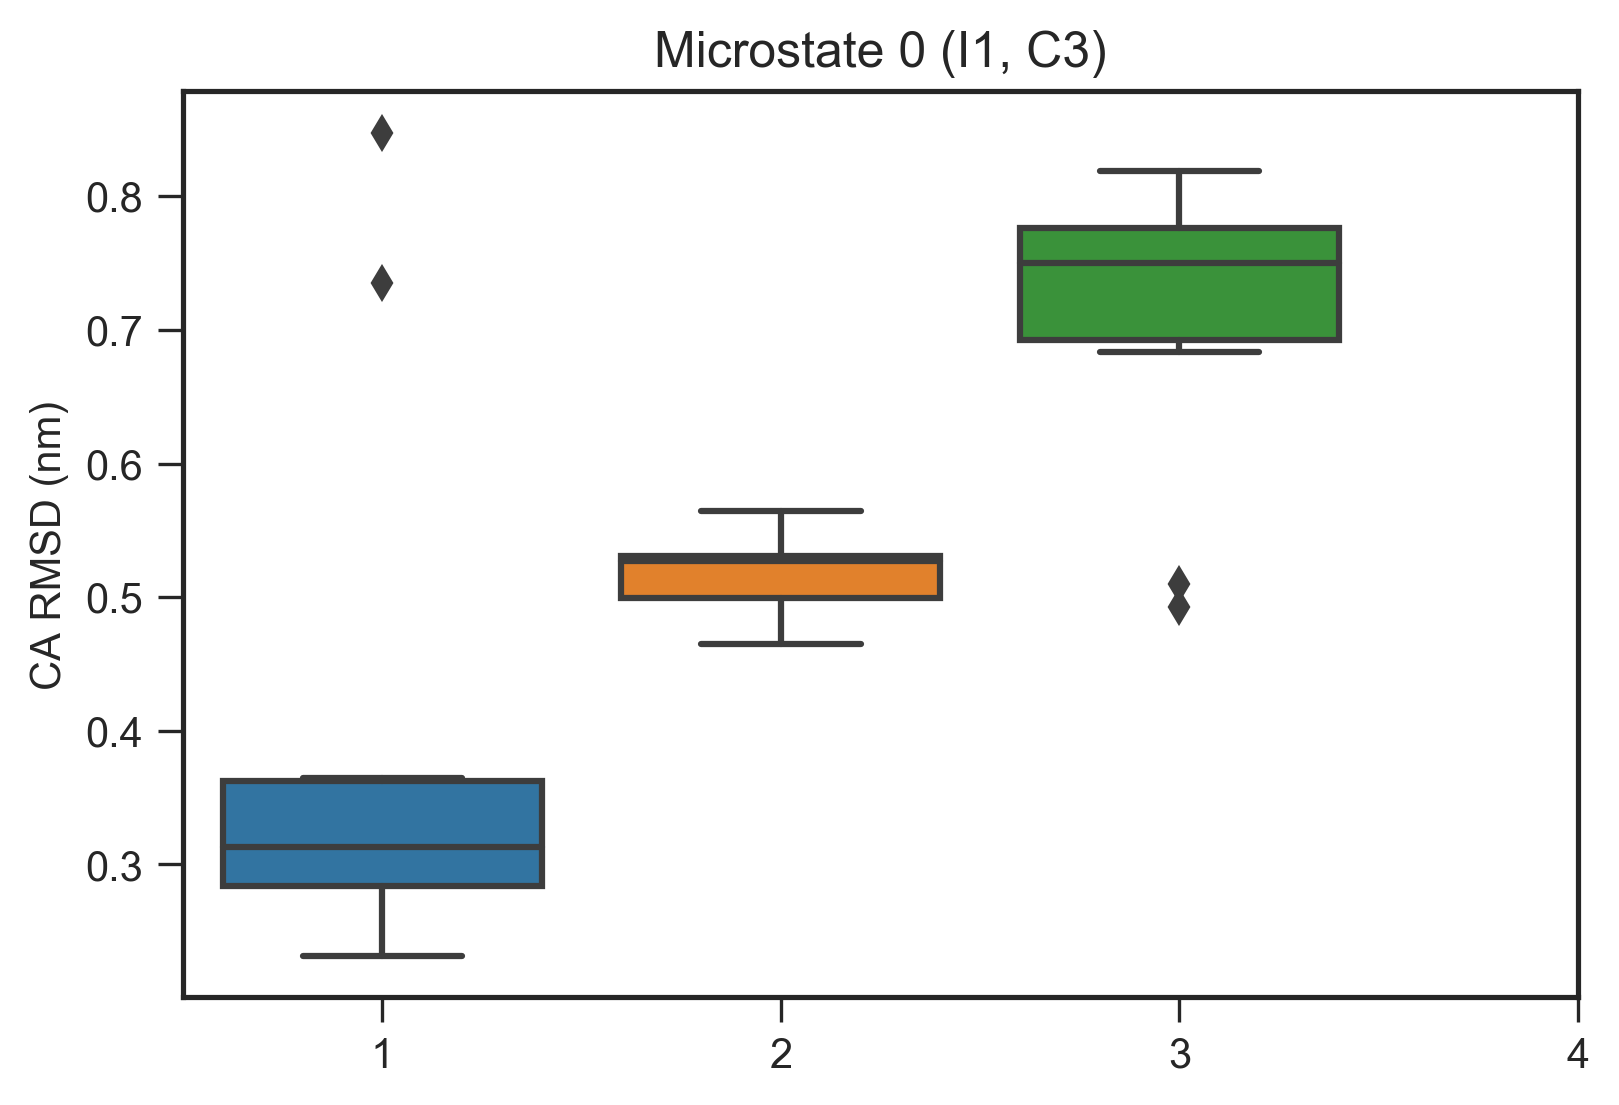

In [64]:
i = 0
plt.figure(dpi=300)
sns.boxplot(x = np.arange(3), y = seti_rmsds[i])
#sns.boxplot(x = np.arange(4), y = cflank_rmsds[i])
plt.ylabel('CA RMSD (nm)')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.title('Microstate %d (I%d, C%d)' % (i, top1000_assign[i][0], top1000_assign[i][1]))
plt.show()

In [65]:
for i in range(100):
    plt.figure(dpi=300)
    sns.boxplot(x = np.arange(3), y = seti_rmsds[i])
    plt.ylabel('CA RMSD (nm)')
    plt.xticks([0,1,2], [1,2,3])
    plt.title('Microstate %d (I%d, C%d) - SET-I' % (i, top1000_assign[i][0], top1000_assign[i][1]))
    plt.savefig('microstate_startconf_classification/top10/%d_seti.png' % i, dpi=300)
    plt.close()

In [66]:
for i in range(100):
    plt.figure(dpi=300)
    sns.boxplot(x = np.arange(4), y = cflank_rmsds[i])
    plt.ylabel('CA RMSD (nm)')
    plt.xticks([0,1,2,3], [1,2,3,4])
    plt.title('Microstate %d (I%d, C%d) - C-flank' % (i, top1000_assign[i][0], top1000_assign[i][1]))
    plt.savefig('microstate_startconf_classification/top10/%d_cflank.png' % i, dpi=300)
    plt.close()

In [53]:
# ok great - next: 4x3 heatmap - assign microstate population weights to the frames and hence calculate population
# of every 4X3=12 structural category

In [67]:
# make msm, get populations

In [16]:
import pyemma

In [17]:
dtrajs = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/100.npy')

In [18]:
msm = pyemma.msm.estimate_markov_model(list(dtrajs), lag=100)

In [19]:
msm.pi[0]

0.0030667341964934888

In [20]:
np.where(msm.active_set == 70)[0]

array([69])

In [ ]:
msm.

In [75]:
heatmap_top100 = np.zeros((3,4))

In [76]:
heatmap_top100

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [77]:
top100_assign[0]

[1, 3]

In [78]:
top1000_assign[0]

[1, 3]

In [21]:
heatmap_top100 = np.zeros((3,4))
for i in range(100):
    j = np.where(msm.active_set == i)[0]
    if j:
        heatmap_top100[(top100_assign[i][0]-1), (top100_assign[i][1]-1)] += msm.pi[j[0]]
        
heatmap_top100 = heatmap_top100 / np.sum(heatmap_top100)        

In [22]:
heatmap_top100

array([[ 0.07598152,  0.06615538,  0.09372887,  0.0635588 ],
       [ 0.07263115,  0.01753445,  0.16033126,  0.04550951],
       [ 0.06454185,  0.        ,  0.29764238,  0.04238482]])

In [38]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

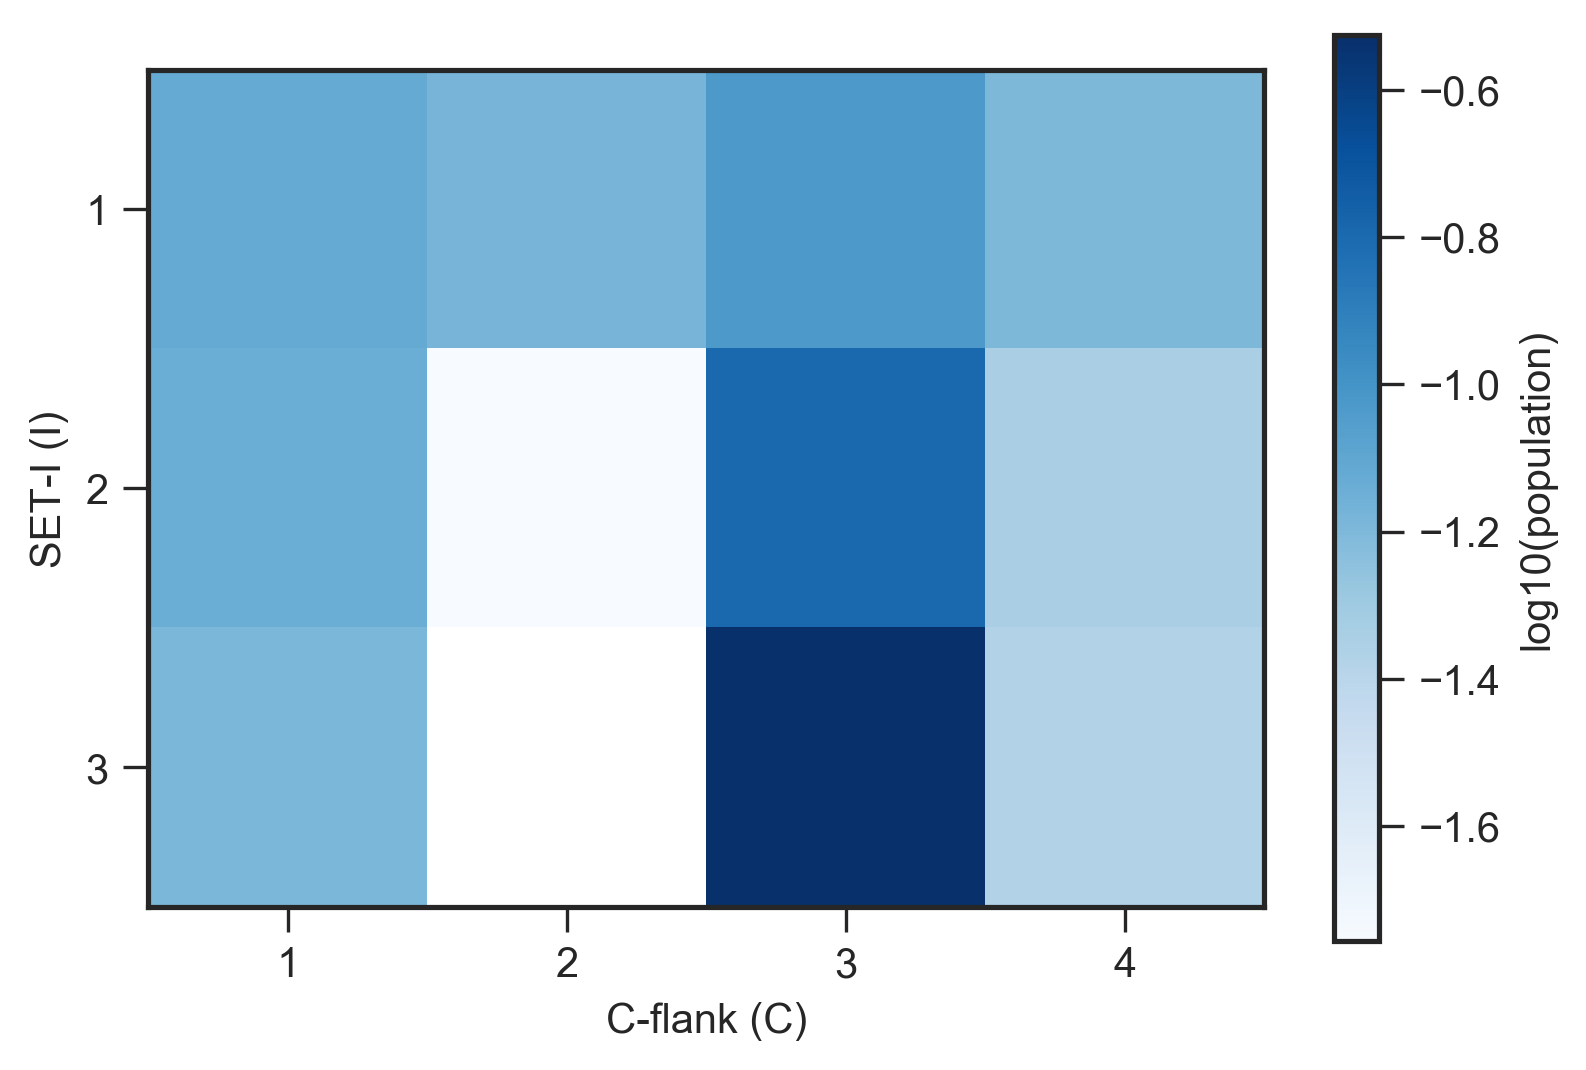

In [39]:
plt.figure(dpi=300)
plt.imshow(np.log10(heatmap_top100), cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(population)')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.savefig('top100_heatmap_log.png', dpi=300)
plt.show()

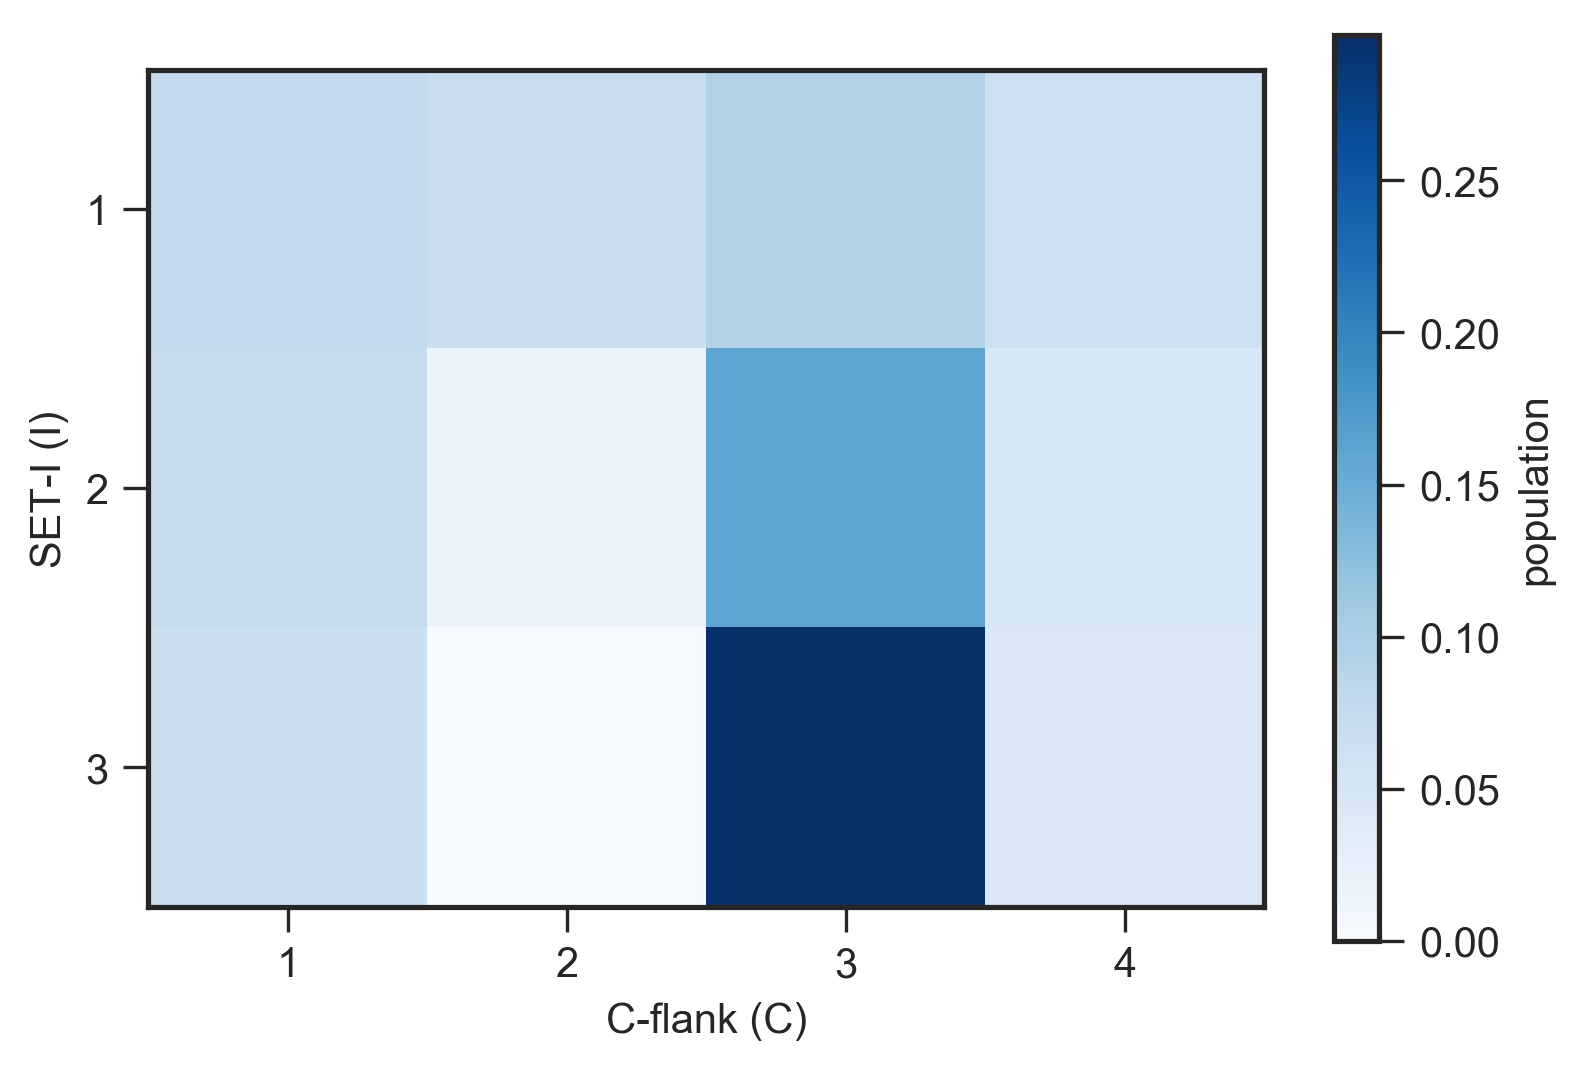

In [40]:
plt.figure(dpi=300)
plt.imshow(heatmap_top100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('population')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.savefig('top100_heatmap.png', dpi=300)
plt.show()

In [113]:
# now use top1000 - a) assign based on mean of the top10 frames, b) assign all top10 frames separately

In [23]:
heatmap_top1000 = np.zeros((3,4))
for i in range(100):
    j = np.where(msm.active_set == i)[0]
    if j:
        heatmap_top1000[(top1000_assign[i][0]-1), (top1000_assign[i][1]-1)] += msm.pi[j[0]]
        
heatmap_top1000 = heatmap_top1000 / np.sum(heatmap_top1000)        

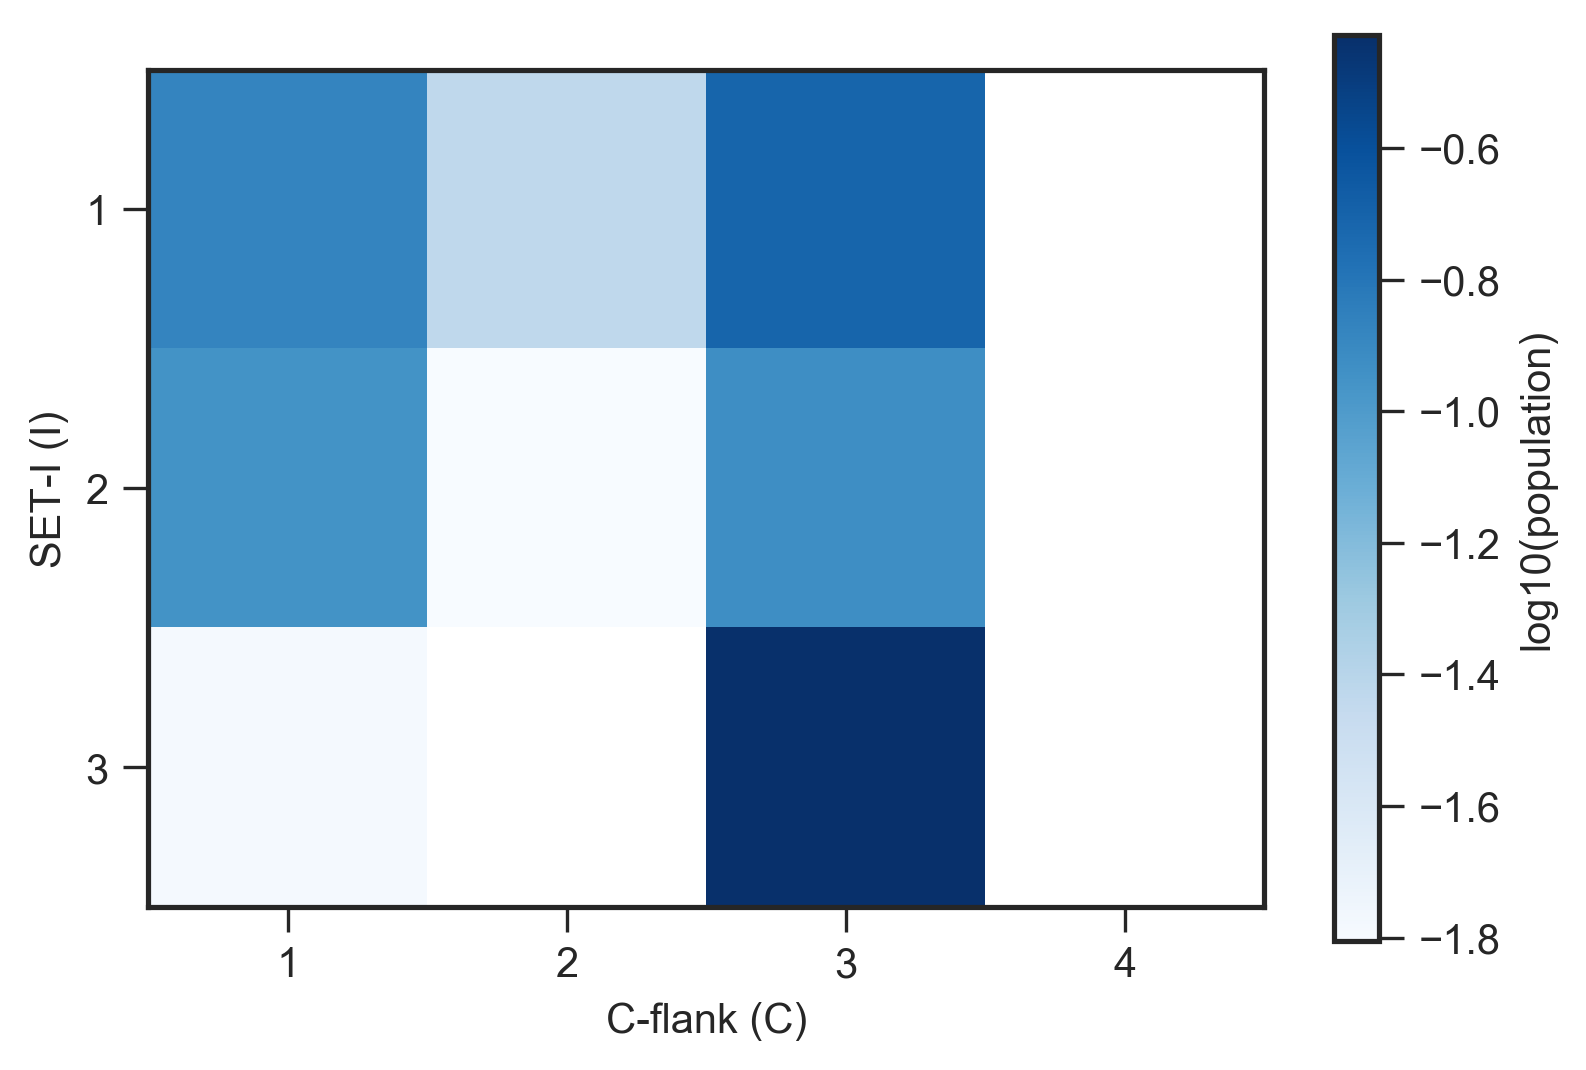

In [115]:
plt.figure(dpi=300)
plt.imshow(np.log10(heatmap_top1000), cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(population)')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.show()

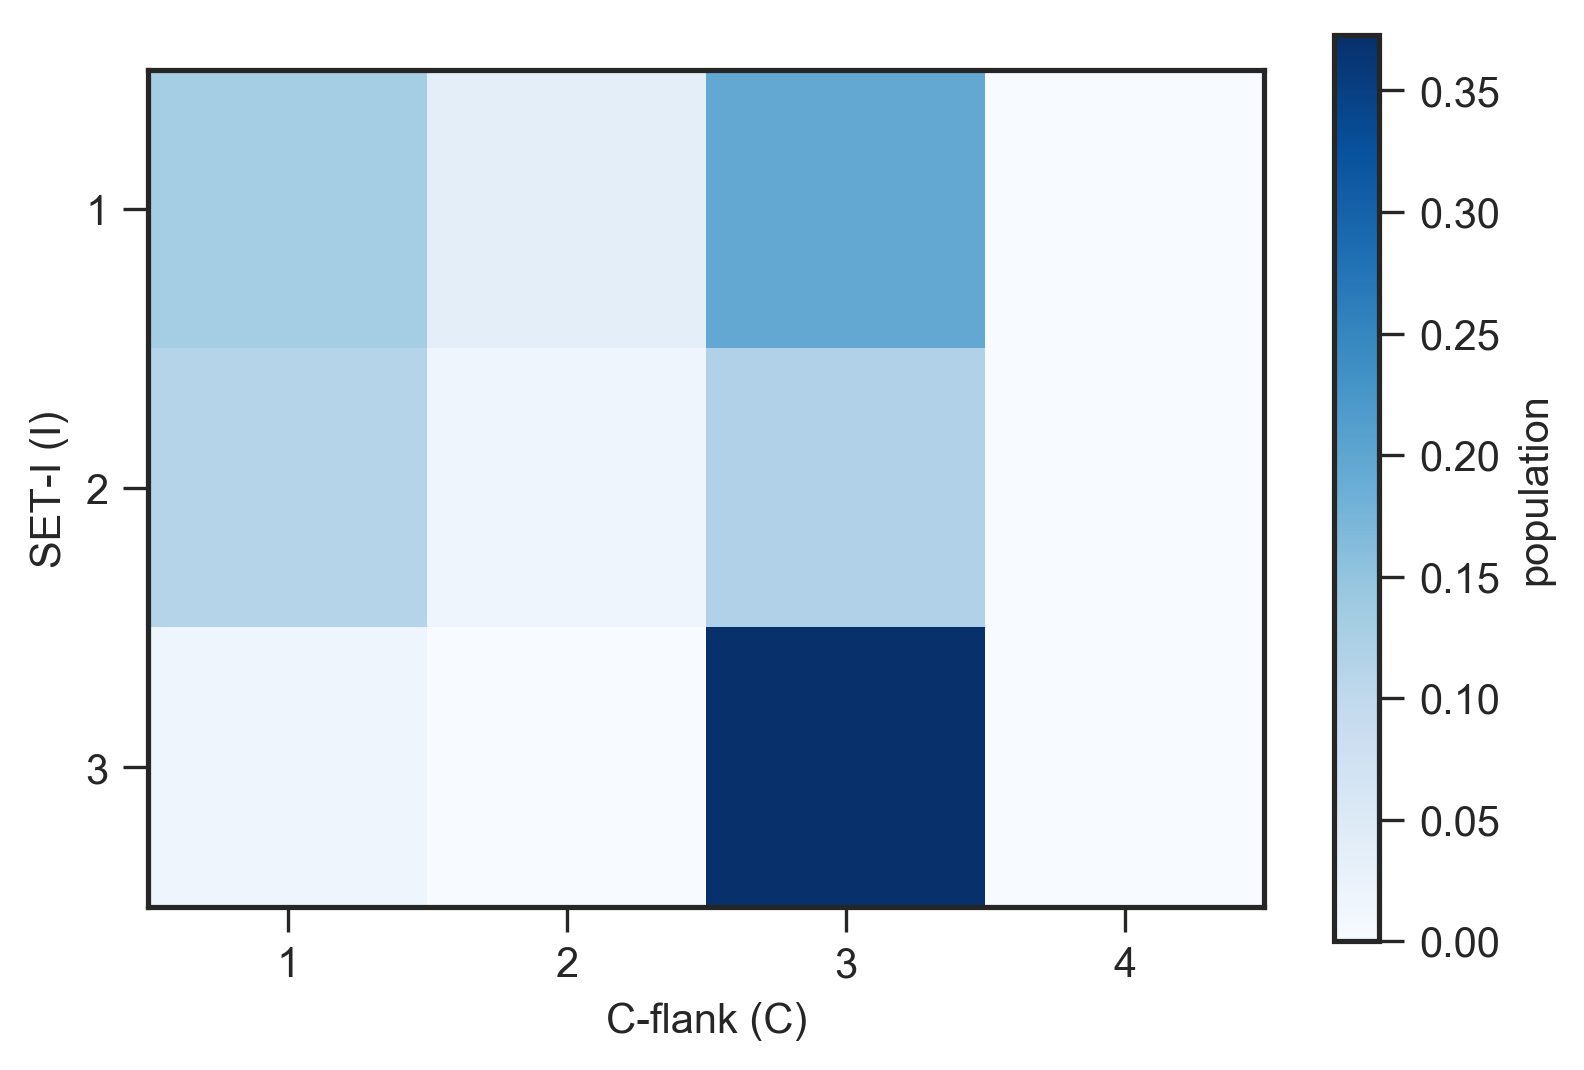

In [116]:
plt.figure(dpi=300)
plt.imshow(heatmap_top1000, cmap='Blues')
cb = plt.colorbar()
cb.set_label('population')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.show()

In [117]:
# now assign each frame separately

In [27]:
top1000_assign_everyframe = []

for i in range(100):
    top1000_assign_everyframe.append([])
    for j in range(10):
        top1000_assign_everyframe[-1].append([])
        top1000_assign_everyframe[-1][-1].append(np.argmin([seti_rmsds[i][0][j], seti_rmsds[i][1][j], seti_rmsds[i][2][j]])+1)
        top1000_assign_everyframe[-1][-1].append(np.argmin([cflank_rmsds[i][0][j], cflank_rmsds[i][1][j], cflank_rmsds[i][2][j], cflank_rmsds[i][3][j]])+1)

In [30]:
top1000_assign_everyframe[0]

[[1, 3],
 [1, 3],
 [1, 3],
 [1, 3],
 [3, 3],
 [1, 3],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 3]]

In [31]:
heatmap_top1000_evfr = np.zeros((3,4))
for i in range(100):
    j = np.where(msm.active_set == i)[0]
    if j:
        for k in range(10):
            heatmap_top1000_evfr[(top1000_assign_everyframe[i][k][0]-1), (top1000_assign_everyframe[i][k][1]-1)] += msm.pi[j[0]]
        
heatmap_top1000_evfr = heatmap_top1000_evfr / np.sum(heatmap_top1000_evfr)        

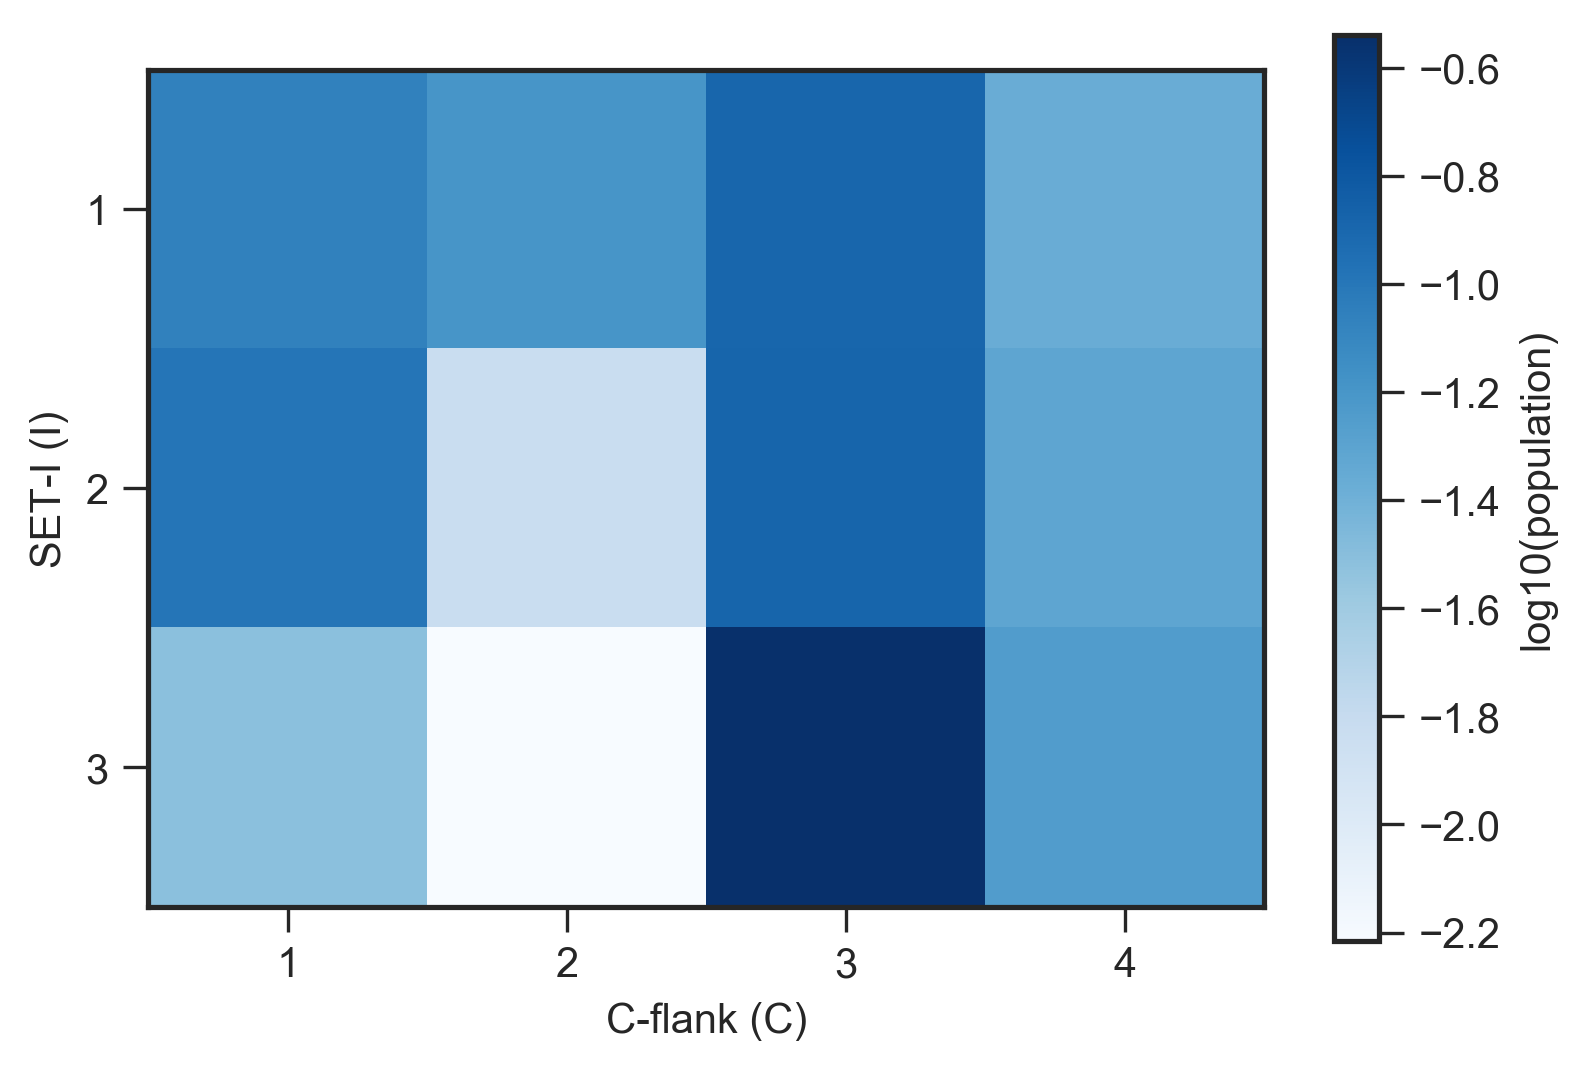

In [41]:
plt.figure(dpi=300)
plt.imshow(np.log10(heatmap_top1000_evfr), cmap='Blues')
cb = plt.colorbar()
cb.set_label('log10(population)')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.savefig('top1000_heatmap_log.png', dpi=300)
plt.show()

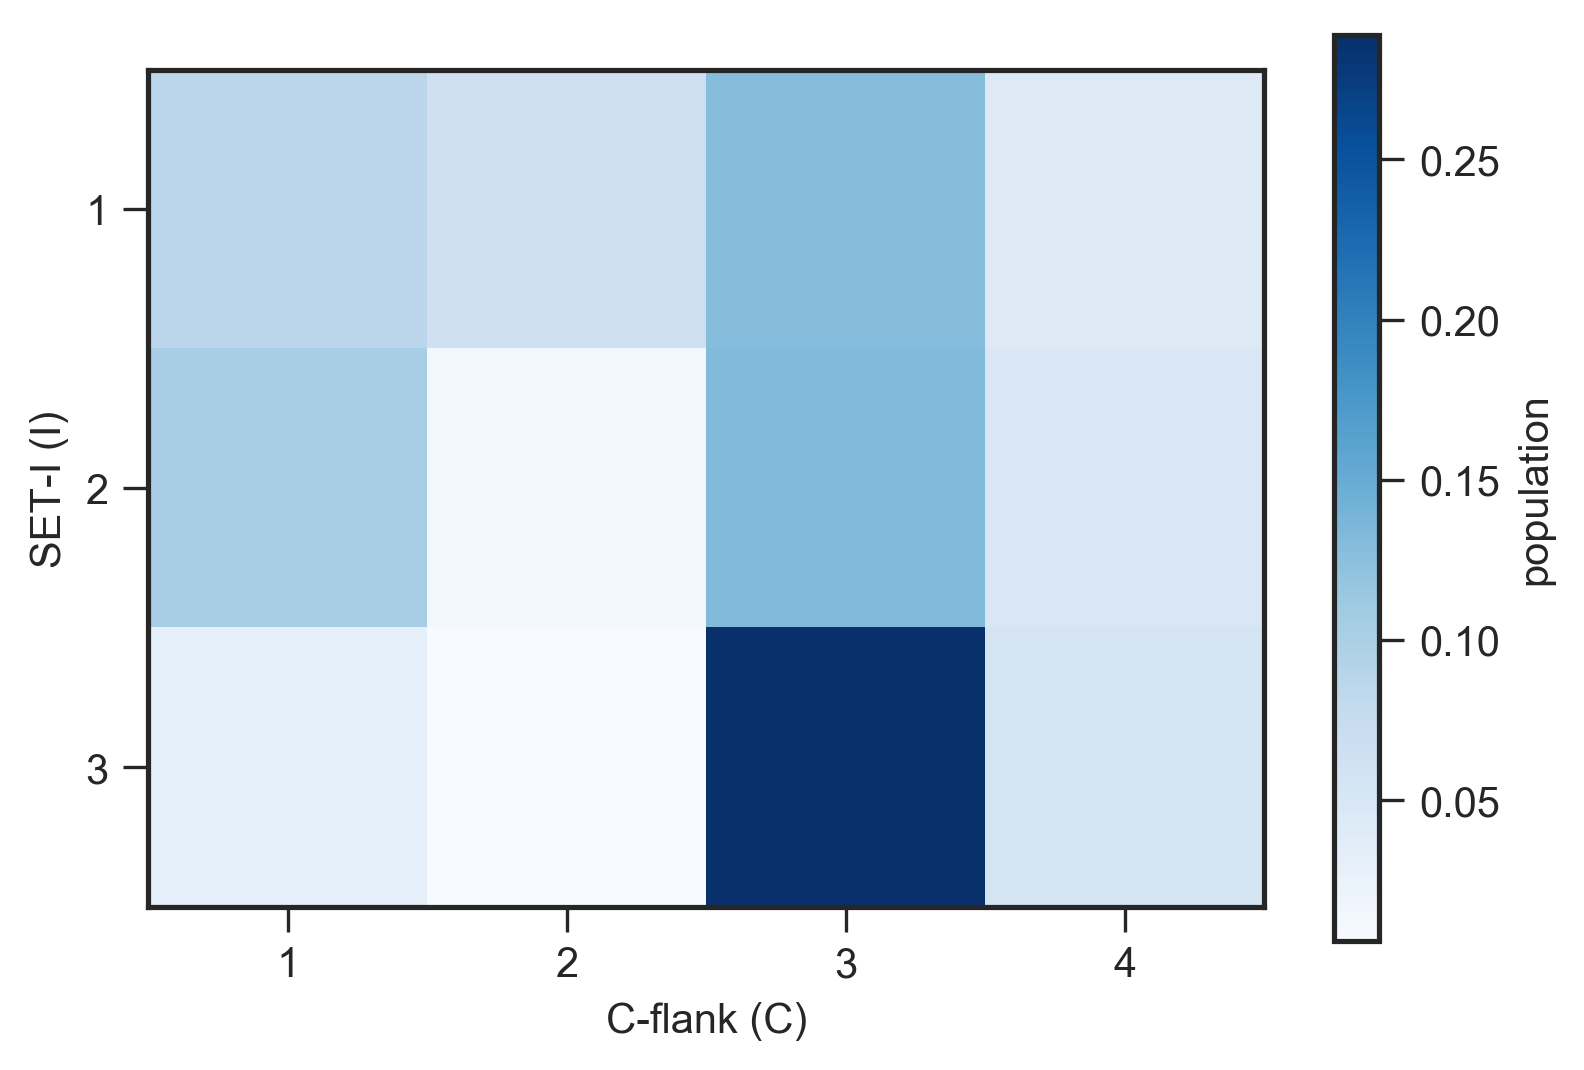

In [42]:
plt.figure(dpi=300)
plt.imshow(heatmap_top1000_evfr, cmap='Blues')
cb = plt.colorbar()
cb.set_label('population')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.savefig('top1000_heatmap.png', dpi=300)
plt.show()

In [36]:
# compare to top100

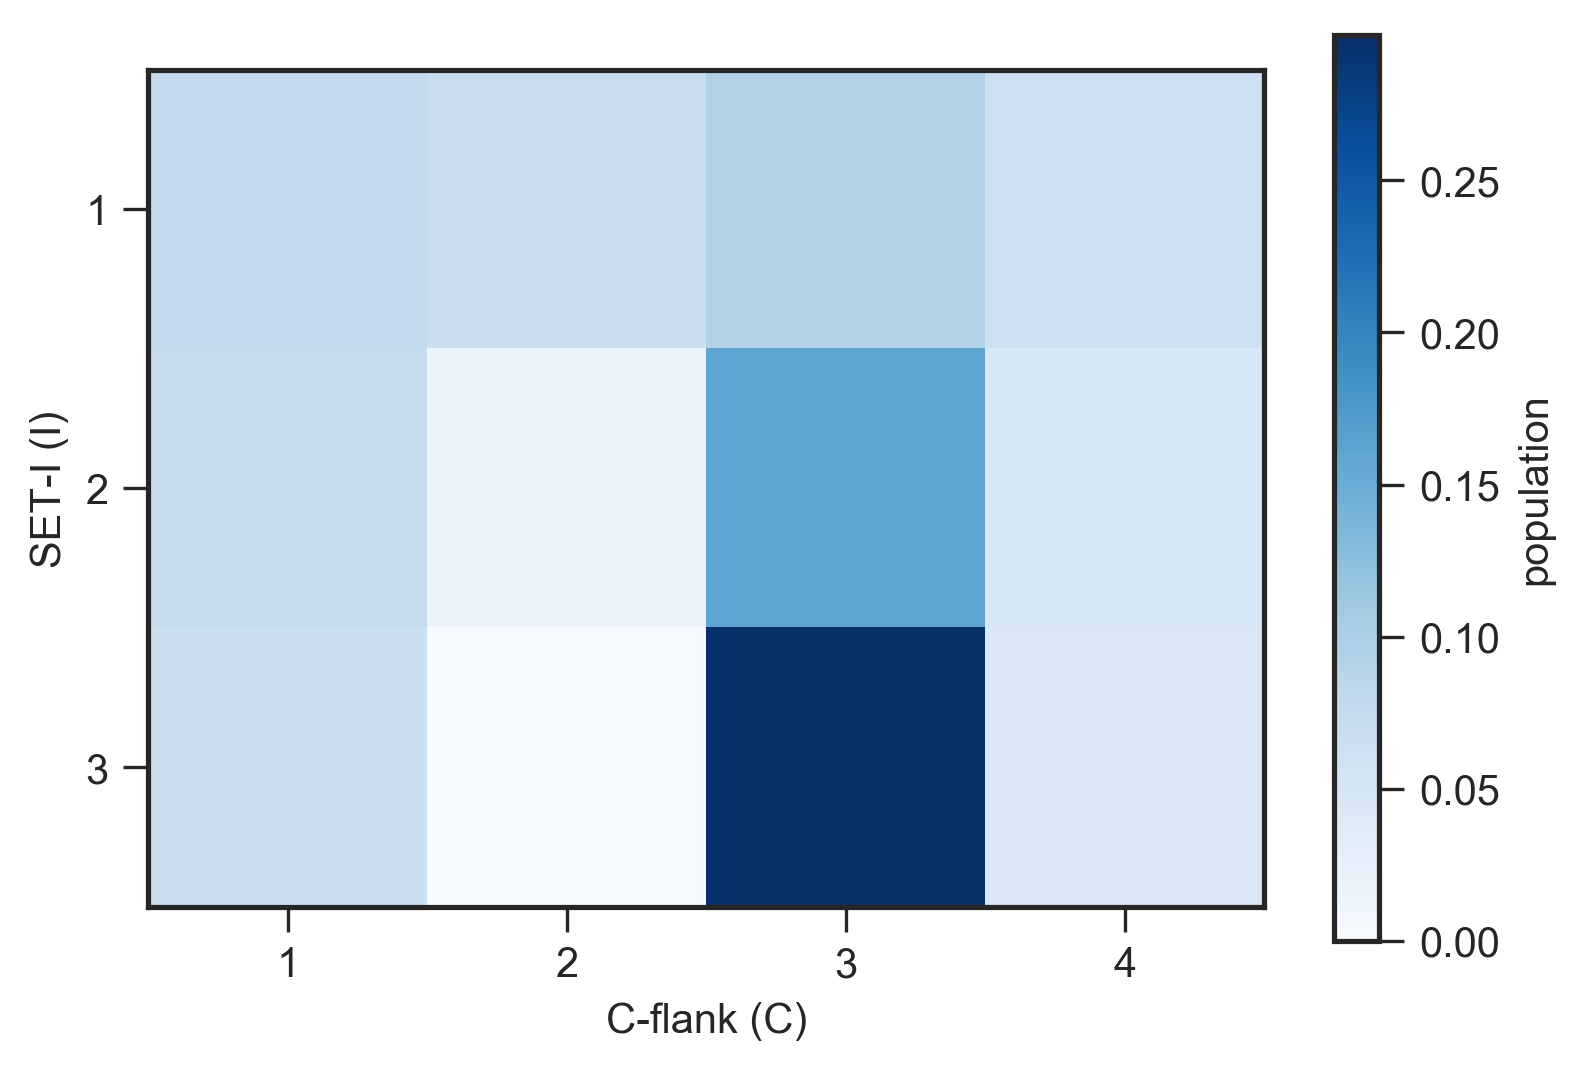

In [35]:
plt.figure(dpi=300)
plt.imshow(heatmap_top100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('population')
plt.xticks([0,1,2,3], [1,2,3,4])
plt.yticks([0,1,2], [1,2,3])
plt.xlabel('C-flank (C)')
plt.ylabel('SET-I (I)')
plt.show()

In [ ]:
# next do top10k (100 per microstate), then random 10/100 per microstate, then random draw from all frames (with population weights)
# for 1k / 10k frames